In [1]:
import numpy as np
import pandas as pd
from glob import glob
# merge csv files
yelp = pd.read_csv('yelp_reviews.csv')


print(yelp.shape)
yelp.head()

(7012462, 2)


,review_stars,text
0,4,What a treat it was to find Sidebar in Downtow...
1,5,I love Sunchain! I have been a customer for ov...
2,3,The food is good. But the service is suck comp...
3,1,We went here the first week they opened and we...
4,1,"Beware, discriminating amongst the gay communi..."


Text(0, 0.5, 'Reviews')

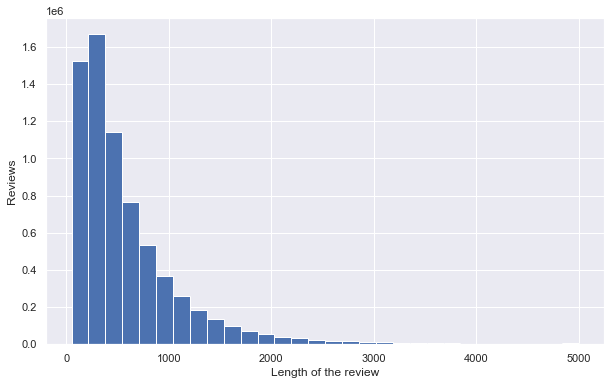

In [2]:
import matplotlib.pyplot as plt
import seaborn


plt.rc('figure', figsize=(10,6))
seaborn.set()
colors = seaborn.color_palette()
yelp.text.dropna().str.len().hist(bins=30)
plt.xlabel('Length of the review')
plt.ylabel('Number of reviews')
plt.ylabel('Reviews')

In [4]:
sorted(yelp['review_stars'].unique())

[1, 2, 3, 4, 5]

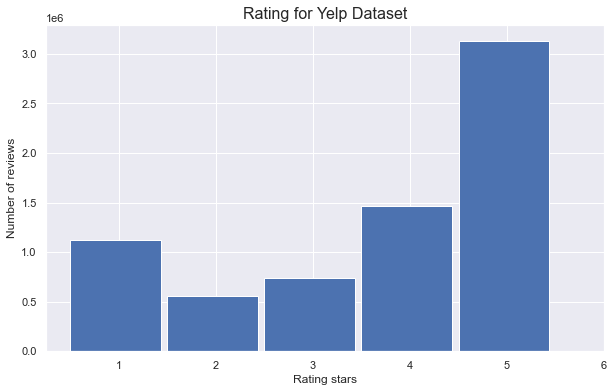

In [4]:
bins = [1 ,2 ,3 ,4, 5, 6]
yelp.review_stars.hist(bins=bins, align='left', width=0.93)
plt.xticks(bins)
plt.xlabel('Rating stars')
plt.ylabel('Number of reviews')
plt.title("Rating for Yelp Dataset", fontsize=16)
plt.show()

In [5]:
target_count = yelp.review_stars.value_counts()
print('1 Star:', target_count[1])
print('2 Star:', target_count[2])
print('3 Star:', target_count[3])
print('4 Star:', target_count[4])
print('5 Star:', target_count[5])

1 Star: 1126464
2 Star: 555808
3 Star: 736257
4 Star: 1460423
5 Star: 3133510


In [19]:
#Binary classification
yelp['rating'] = yelp['review_stars'].replace({1:'Low Rating', 2:'Low Rating', 3:'Low Rating',
                                           4:'High Rating', 5:'High Rating'})
yelp.rating.value_counts()

High Rating    4593933
Low Rating     2418529
Name: rating, dtype: int64

In [6]:
#Average Rating of Fitness
ratings = list(yelp['review_stars'])
print("Average Rating of Yelp Dataset is:",sum(ratings)/len(ratings))

Average Rating of Yelp Dataset is: 3.7014236939893577


In [7]:
#average length of reviews
totalreviews = list(yelp['text'])
length = []
for i in range(0,len(totalreviews)):
        totalreviews[i] = str(totalreviews[i])
        a = len(totalreviews[i].split(' '))
        length.append(a)

    
print("On average a review of Yelp Dataset has about:", sum(length)/len(length))

On average a review of Yelp Dataset has about: 110.77891773245973


In [8]:
#total reviews number
len(length)

7012462

In [9]:
yelp['length'] =  length
yelp['ratings'] =  ratings
five_star = yelp.loc[yelp['ratings'] == 5,:]
five = sum(five_star['length'])/len(five_star['length'])
four_star = yelp.loc[yelp['ratings'] == 4,:]
four = sum(four_star['length'])/len(four_star['length'])
three_star = yelp.loc[yelp['ratings'] == 3,:]
three = sum(three_star['length'])/len(three_star['length'])
two_star = yelp.loc[yelp['ratings'] == 2,:]
two = sum(two_star['length'])/len(two_star['length'])
one_star = yelp.loc[yelp['ratings'] == 1,:]
one = sum(one_star['length'])/len(one_star['length'])

In [10]:
print("five:",five,"four:",four,"three:",three,"two:",two,"one:",one)

five: 87.36198927081772 four: 114.31989293512908 three: 131.54477173052345 two: 141.62237319362083 one: 142.536535566161


In [12]:
#5 star has the shortest review length, 1 star has the longest

c:\users\wang\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


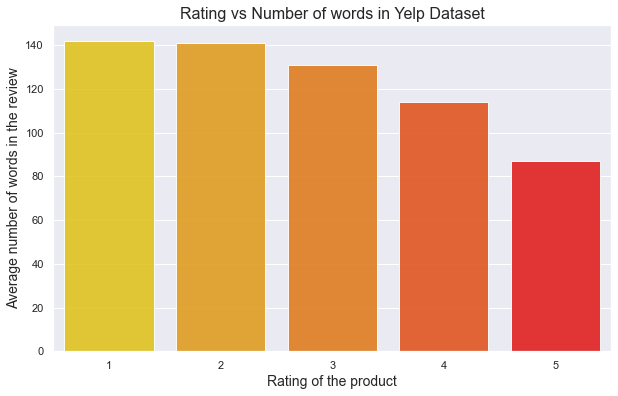

In [11]:
colors = ['#ffd900', '#ffa600','#ff7b00', '#ff4800', '#ff0000']
seaborn.set_palette(seaborn.color_palette(colors))
top = ['1','2','3','4','5']
value = [int(one), int(two),int(three),int(four),int(five)]
seaborn.barplot(top, value, alpha=0.9)
plt.xlabel('Rating of the product', fontsize=14)
plt.ylabel('Average number of words in the review', fontsize=14)
plt.title("Rating vs Number of words in Yelp Dataset", fontsize=16)
plt.show()

# Baseline

In [13]:
#The simplest baseline for each of these predictive tasks is a model that always predicts the most common rating.
yelp['baseline_rating'] = 5

print("Baseline of rating Yelp Dataset = 5" )

Baseline of rating Yelp Dataset = 5


In [14]:
t = yelp[['review_stars', 'baseline_rating']].dropna(how='any')

In [16]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


precision = metrics.precision_score(t.review_stars, t.baseline_rating, average='macro')
recall = metrics.recall_score(t.review_stars, t.baseline_rating, average='macro')
f1 = metrics.f1_score(t.review_stars, t.baseline_rating, average='macro')
accuracy = accuracy_score(t.review_stars, t.baseline_rating)

baselineResult = {}

data = {'precision':precision,
        'recall':recall,
        'f1_score':f1,
        'accuracy':accuracy}

baselineResult['Baseline of Yelp Dataset'] = data
pd.DataFrame(baselineResult).T

,accuracy,f1_score,precision,recall
Baseline of Yelp Dataset,0.446849,0.123537,0.08937,0.2


# ________________________________________

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline



In [4]:
# Instances for pipeline
#verbose = to show progress, higher number show more details
#n_jobs = n of process running in parallelly
#rus = RandomUnderSampler(sampling_strategy='not minority')
rus = RandomUnderSampler(sampling_strategy='not minority') 
#svclassifier = SVC(kernel='linear', verbose=True, cache_size=8192)
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,1),encoding='utf-8')

# Train_Test_Split

In [5]:
from sklearn.model_selection import train_test_split

X = yelp['text']
Y = yelp['review_stars']

X_new, Y_new = rus.fit_sample(X.values.reshape(-1,1),Y)

print('Y_new长度:',len(Y_new))
#555808 * 5 =2779040

Y_new长度: 2779040


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_new, Y_new, test_size=0.3, random_state=1)

In [13]:
from sklearn.svm import LinearSVC
clf = LinearSVC(C = 0.05, verbose=2)

In [14]:
pipe_fitness = Pipeline([('vect', vect), ('clf', clf)])

In [15]:
pipe_fitness.fit(X_train.flatten(),y_train)

[LibLinear]

Pipeline(steps=[('vect', TfidfVectorizer(stop_words='english')),
                ('clf', LinearSVC(C=0.05, verbose=2))])

In [16]:
y_pred=pipe_fitness.predict(X_test.flatten())

In [11]:
# if you wanna do gridsearch for better parameter, start from before training model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

pipeline = Pipeline([
    ('vect', vect),
    ('clf', LinearSVC())
])

parameters = {
    'clf__C': (0.03,0.04,0.05,0.06),
    #'clf__penalty':('l1','l2')
    #'clf__epsilon': (0.4,0.5,0.6),
     #'clf__loss':('epsilon_insensitive','squared_epsilon_insensitive')
}

#3x2x3=24 , 15的时候就40G了，24的话ram快不够用了
grid_search = GridSearchCV(pipeline, parameters, n_jobs=4, scoring='accuracy', verbose=2, cv = 4)
    
grid_search.fit(X_train.flatten(), y_train)
print('Best score of accuracy: ', grid_search.best_score_)
print('Best parameter set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(best_parameters):
    print(param_name, best_parameters[param_name])

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed: 16.6min finished


Best score of accuracy:  0.5964027660116957
Best parameter set:
clf LinearSVC(C=0.05)
clf__C 0.05
clf__class_weight None
clf__dual True
clf__fit_intercept True
clf__intercept_scaling 1
clf__loss squared_hinge
clf__max_iter 1000
clf__multi_class ovr
clf__penalty l2
clf__random_state None
clf__tol 0.0001
clf__verbose 0
memory None
steps [('vect', TfidfVectorizer(stop_words='english')), ('clf', LinearSVC(C=0.05))]
vect TfidfVectorizer(stop_words='english')
vect__analyzer word
vect__binary False
vect__decode_error strict
vect__dtype <class 'numpy.float64'>
vect__encoding utf-8
vect__input content
vect__lowercase True
vect__max_df 1.0
vect__max_features None
vect__min_df 1
vect__ngram_range (1, 1)
vect__norm l2
vect__preprocessor None
vect__smooth_idf True
vect__stop_words english
vect__strip_accents None
vect__sublinear_tf False
vect__token_pattern (?u)\b\w\w+\b
vect__tokenizer None
vect__use_idf True
vect__vocabulary None
verbose False


In [9]:
# if you wanna do gridsearch for better parameter, start from before training model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

pipeline = Pipeline([
    ('vect', vect),
    ('clf', LinearSVC())
])

parameters = {
    'clf__C': (0.06,0.07,0.08,0.09),
    #'clf__penalty':('l1','l2')
    #'clf__epsilon': (0.4,0.5,0.6),
     #'clf__loss':('epsilon_insensitive','squared_epsilon_insensitive')
}

#3x2x3=24 , 15的时候就40G了，24的话ram快不够用了
grid_search = GridSearchCV(pipeline, parameters, n_jobs=4, scoring='accuracy', verbose=2, cv = 4)
    
grid_search.fit(X_train.flatten(), y_train)
print('Best score of accuracy: ', grid_search.best_score_)
print('Best parameter set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(best_parameters):
    print(param_name, best_parameters[param_name])

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed: 17.4min finished


Best score of accuracy:  0.5963487905381509
Best parameter set:
clf LinearSVC(C=0.06)
clf__C 0.06
clf__class_weight None
clf__dual True
clf__fit_intercept True
clf__intercept_scaling 1
clf__loss squared_hinge
clf__max_iter 1000
clf__multi_class ovr
clf__penalty l2
clf__random_state None
clf__tol 0.0001
clf__verbose 0
memory None
steps [('vect', TfidfVectorizer(stop_words='english')), ('clf', LinearSVC(C=0.06))]
vect TfidfVectorizer(stop_words='english')
vect__analyzer word
vect__binary False
vect__decode_error strict
vect__dtype <class 'numpy.float64'>
vect__encoding utf-8
vect__input content
vect__lowercase True
vect__max_df 1.0
vect__max_features None
vect__min_df 1
vect__ngram_range (1, 1)
vect__norm l2
vect__preprocessor None
vect__smooth_idf True
vect__stop_words english
vect__strip_accents None
vect__sublinear_tf False
vect__token_pattern (?u)\b\w\w+\b
vect__tokenizer None
vect__use_idf True
vect__vocabulary None
verbose False


In [8]:
# if you wanna do gridsearch for better parameter, start from before training model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

pipeline = Pipeline([
    ('vect', vect),
    ('clf', LinearSVC())
])

parameters = {
    'clf__C': (0.08,0.09,0.1,0.11),
    #'clf__penalty':('l1','l2')
    #'clf__epsilon': (0.4,0.5,0.6),
     #'clf__loss':('epsilon_insensitive','squared_epsilon_insensitive')
}

#3x2x3=24 , 15的时候就40G了，24的话ram快不够用了
grid_search = GridSearchCV(pipeline, parameters, n_jobs=4, scoring='accuracy', verbose=2, cv = 4)
    
grid_search.fit(X_train.flatten(), y_train)
print('Best score of accuracy: ', grid_search.best_score_)
print('Best parameter set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(best_parameters):
    print(param_name, best_parameters[param_name])

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed: 17.2min finished


Best score of accuracy:  0.5958974527688904
Best parameter set:
clf LinearSVC(C=0.08)
clf__C 0.08
clf__class_weight None
clf__dual True
clf__fit_intercept True
clf__intercept_scaling 1
clf__loss squared_hinge
clf__max_iter 1000
clf__multi_class ovr
clf__penalty l2
clf__random_state None
clf__tol 0.0001
clf__verbose 0
memory None
steps [('vect', TfidfVectorizer(stop_words='english')), ('clf', LinearSVC(C=0.08))]
vect TfidfVectorizer(stop_words='english')
vect__analyzer word
vect__binary False
vect__decode_error strict
vect__dtype <class 'numpy.float64'>
vect__encoding utf-8
vect__input content
vect__lowercase True
vect__max_df 1.0
vect__max_features None
vect__min_df 1
vect__ngram_range (1, 1)
vect__norm l2
vect__preprocessor None
vect__smooth_idf True
vect__stop_words english
vect__strip_accents None
vect__sublinear_tf False
vect__token_pattern (?u)\b\w\w+\b
vect__tokenizer None
vect__use_idf True
vect__vocabulary None
verbose False


In [46]:
# if you wanna do gridsearch for better parameter, start from before training model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

pipeline = Pipeline([
    ('vect', vect),
    ('clf', LinearSVC())
])

parameters = {
    'clf__C': (0.01,0.1,0.2,),
    #'clf__penalty':('l1','l2')
    #'clf__epsilon': (0.4,0.5,0.6),
     #'clf__loss':('epsilon_insensitive','squared_epsilon_insensitive')
}

#3x2x3=24 , 15的时候就40G了，24的话ram快不够用了
grid_search = GridSearchCV(pipeline, parameters, n_jobs=4, scoring='accuracy', verbose=2, cv = 4)
    
grid_search.fit(X_train.flatten(), y_train)
print('Best score of accuracy: ', grid_search.best_score_)
print('Best parameter set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(best_parameters):
    print(param_name, best_parameters[param_name])

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed: 12.2min remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed: 12.2min finished


Best score of accuracy:  0.5955062590987227
Best parameter set:
clf LinearSVC(C=0.1)
clf__C 0.1
clf__class_weight None
clf__dual True
clf__fit_intercept True
clf__intercept_scaling 1
clf__loss squared_hinge
clf__max_iter 1000
clf__multi_class ovr
clf__penalty l2
clf__random_state None
clf__tol 0.0001
clf__verbose 0
memory None
steps [('vect', TfidfVectorizer(stop_words='english')), ('clf', LinearSVC(C=0.1))]
vect TfidfVectorizer(stop_words='english')
vect__analyzer word
vect__binary False
vect__decode_error strict
vect__dtype <class 'numpy.float64'>
vect__encoding utf-8
vect__input content
vect__lowercase True
vect__max_df 1.0
vect__max_features None
vect__min_df 1
vect__ngram_range (1, 1)
vect__norm l2
vect__preprocessor None
vect__smooth_idf True
vect__stop_words english
vect__strip_accents None
vect__sublinear_tf False
vect__token_pattern (?u)\b\w\w+\b
vect__tokenizer None
vect__use_idf True
vect__vocabulary None
verbose False


In [45]:
# if you wanna do gridsearch for better parameter, start from before training model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

pipeline = Pipeline([
    ('vect', vect),
    ('clf', LinearSVC())
])

parameters = {
    'clf__C': (0.2,0.3,0.4,),
    #'clf__penalty':('l1','l2')
    #'clf__epsilon': (0.4,0.5,0.6),
     #'clf__loss':('epsilon_insensitive','squared_epsilon_insensitive')
}

#3x2x3=24 , 15的时候就40G了，24的话ram快不够用了
grid_search = GridSearchCV(pipeline, parameters, n_jobs=4, scoring='accuracy', verbose=2, cv = 4)
    
grid_search.fit(X_train.flatten(), y_train)
print('Best score of accuracy: ', grid_search.best_score_)
print('Best parameter set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(best_parameters):
    print(param_name, best_parameters[param_name])

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed: 13.8min remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed: 13.8min finished


Best score of accuracy:  0.5934042999432486
Best parameter set:
clf LinearSVC(C=0.2)
clf__C 0.2
clf__class_weight None
clf__dual True
clf__fit_intercept True
clf__intercept_scaling 1
clf__loss squared_hinge
clf__max_iter 1000
clf__multi_class ovr
clf__penalty l2
clf__random_state None
clf__tol 0.0001
clf__verbose 0
memory None
steps [('vect', TfidfVectorizer(stop_words='english')), ('clf', LinearSVC(C=0.2))]
vect TfidfVectorizer(stop_words='english')
vect__analyzer word
vect__binary False
vect__decode_error strict
vect__dtype <class 'numpy.float64'>
vect__encoding utf-8
vect__input content
vect__lowercase True
vect__max_df 1.0
vect__max_features None
vect__min_df 1
vect__ngram_range (1, 1)
vect__norm l2
vect__preprocessor None
vect__smooth_idf True
vect__stop_words english
vect__strip_accents None
vect__sublinear_tf False
vect__token_pattern (?u)\b\w\w+\b
vect__tokenizer None
vect__use_idf True
vect__vocabulary None
verbose False


In [27]:
# if you wanna do gridsearch for better parameter, start from before training model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

pipeline = Pipeline([
    ('vect', vect),
    ('clf', LinearSVC())
])

parameters = {
    'clf__C': (0.5,1,1.5),
    'clf__penalty':('l1','l2')
    #'clf__epsilon': (0.4,0.5,0.6),
     #'clf__loss':('epsilon_insensitive','squared_epsilon_insensitive')
}

#3x2x3=24 , 15的时候就40G了，24的话ram快不够用了
grid_search = GridSearchCV(pipeline, parameters, n_jobs=4, scoring='accuracy', verbose=2, cv = 4)
    
grid_search.fit(X_train.flatten, y_train)
print('Best score of accuracy: ', grid_search.best_score_)
print('Best parameter set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(best_parameters):
    print(param_name, best_parameters[param_name])

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 out of  24 | elapsed: 27.2min finished


Best score of accuracy:  0.5889860218945082
Best parameter set:
clf LinearSVC(C=0.5)
clf__C 0.5
clf__class_weight None
clf__dual True
clf__fit_intercept True
clf__intercept_scaling 1
clf__loss squared_hinge
clf__max_iter 1000
clf__multi_class ovr
clf__penalty l2
clf__random_state None
clf__tol 0.0001
clf__verbose 0
memory None
steps [('vect', TfidfVectorizer(stop_words='english')), ('clf', LinearSVC(C=0.5))]
vect TfidfVectorizer(stop_words='english')
vect__analyzer word
vect__binary False
vect__decode_error strict
vect__dtype <class 'numpy.float64'>
vect__encoding utf-8
vect__input content
vect__lowercase True
vect__max_df 1.0
vect__max_features None
vect__min_df 1
vect__ngram_range (1, 1)
vect__norm l2
vect__preprocessor None
vect__smooth_idf True
vect__stop_words english
vect__strip_accents None
vect__sublinear_tf False
vect__token_pattern (?u)\b\w\w+\b
vect__tokenizer None
vect__use_idf True
vect__vocabulary None
verbose False


In [18]:
from sklearn import metrics, preprocessing, tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

In [19]:
def print_evaluation_scores(y_test, y_pred):
    print("Yelp dataset SVC c= 0.05:")
    print("Accuracy score:",accuracy_score(y_test, y_pred))
    print("F1 score:",f1_score(y_test, y_pred, average='weighted'))
print_evaluation_scores(y_test, y_pred)

Yelp dataset SVC c= 0.05:
Accuracy score: 0.5984704550252365
F1 score: 0.5902901809610128


In [44]:
def print_evaluation_scores(y_test, y_pred):
    print("Yelp dataset SVC c= 0.4:")
    print("Accuracy score:",accuracy_score(y_test, y_pred))
    print("F1 score:",f1_score(y_test, y_pred, average='weighted'))
print_evaluation_scores(y_test, y_pred)

Yelp dataset SVC c= 0.4:
Accuracy score: 0.5925691365843361
F1 score: 0.5850350791307827


In [33]:
def print_evaluation_scores(y_test, y_pred):
    print("Yelp dataset SVC c= 0.5:")
    print("Accuracy score:",accuracy_score(y_test, y_pred))
    print("F1 score:",f1_score(y_test, y_pred, average='weighted'))
print_evaluation_scores(y_test, y_pred)

Yelp dataset SVC c= 0.5:
Accuracy score: 0.5914752336538277
F1 score: 0.5840317410333056


In [16]:
def print_evaluation_scores(y_test, y_pred):
    print("For Yelp dataset:")
    print("Accuracy score:",accuracy_score(y_test, y_pred))
    print("F1 score:",f1_score(y_test, y_pred, average='weighted'))
print_evaluation_scores(y_test, y_pred)

For Yelp dataset:
Accuracy score: 0.5878025025428445
F1 score: 0.5807076941191813


In [14]:
def print_evaluation_scores(y_test, y_pred):
    print("For Fitness:")
    print("Accuracy score:",accuracy_score(y_test, y_pred))
    print("F1 score:",f1_score(y_test, y_pred, average='weighted'))
print_evaluation_scores(y_test, y_pred)

For Fitness:
Accuracy score: 0.5560447624289121
F1 score: 0.552719671039789


In [20]:
#support is the number of the reviews in this test size (y_test) 89300*0.3=26790
print('CLASSIFICATIION METRICS for Yelpdataset SVC C=0.05\n')
print(metrics.classification_report(y_test, y_pred))

CLASSIFICATIION METRICS for Yelpdataset SVC C=0.05

              precision    recall  f1-score   support

           1       0.67      0.80      0.73    166251
           2       0.54      0.47      0.50    166749
           3       0.53      0.43      0.47    166509
           4       0.53      0.52      0.53    167101
           5       0.67      0.77      0.72    167102

    accuracy                           0.60    833712
   macro avg       0.59      0.60      0.59    833712
weighted avg       0.59      0.60      0.59    833712



In [35]:
#support is the number of the reviews in this test size (y_test) 89300*0.3=26790
print('CLASSIFICATIION METRICS for Yelpdataset SVC C=0.5\n')
print(metrics.classification_report(y_test, y_pred))

CLASSIFICATIION METRICS for Yelpdataset SVC C=0.5

              precision    recall  f1-score   support

           1       0.68      0.79      0.73    166251
           2       0.52      0.47      0.50    166749
           3       0.51      0.43      0.47    166509
           4       0.52      0.51      0.51    167101
           5       0.67      0.76      0.72    167102

    accuracy                           0.59    833712
   macro avg       0.58      0.59      0.58    833712
weighted avg       0.58      0.59      0.58    833712



In [17]:
#support is the number of the reviews in this test size (y_test) 89300*0.3=26790
print('\t\tCLASSIFICATIION METRICS for Yelp dataset\n')
print(metrics.classification_report(y_test, y_pred))

		CLASSIFICATIION METRICS for Yelp dataset

              precision    recall  f1-score   support

           1       0.67      0.79      0.73    166251
           2       0.52      0.47      0.49    166749
           3       0.51      0.42      0.46    166509
           4       0.52      0.51      0.51    167101
           5       0.67      0.76      0.71    167102

    accuracy                           0.59    833712
   macro avg       0.58      0.59      0.58    833712
weighted avg       0.58      0.59      0.58    833712



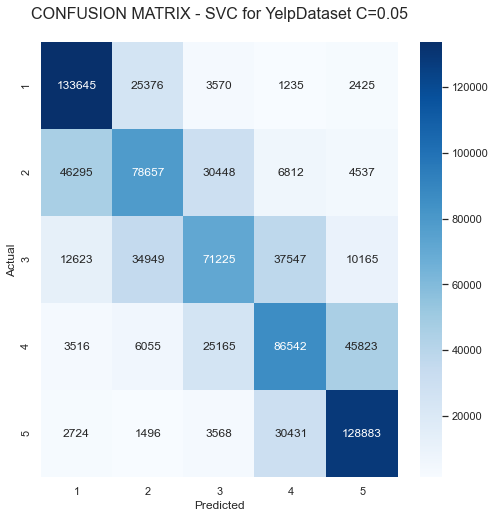

In [21]:
#using seaborn to plot
import matplotlib.pyplot as plt
import seaborn
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
seaborn.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d', xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - SVC for YelpDataset C=0.05\n", size=16);

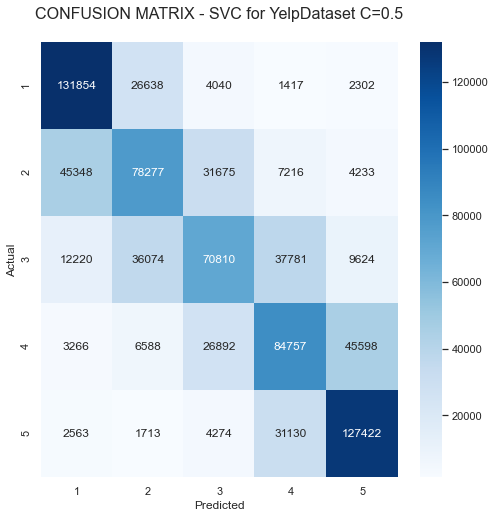

In [36]:
#using seaborn to plot
import matplotlib.pyplot as plt
import seaborn
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
seaborn.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d', xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - SVC for YelpDataset C=0.5\n", size=16);

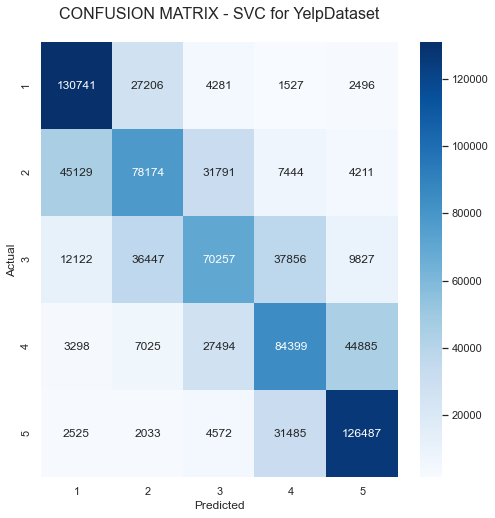

In [18]:
#using seaborn to plot
import matplotlib.pyplot as plt
import seaborn
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
seaborn.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d', xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - SVC for YelpDataset\n", size=16);

In [20]:
import pickle
pickle.dump(pipe_fitness, open('yelp_review_predict_star.pkl', 'wb'))

In [27]:
my_review = ["I already knew App Academy would be tough before I applied, but I never would've thought it was the most difficult experience I had ever imagine. As someone with no prior coding experience, I would say the first few weeks were really hard on me and it doesn't get easier. Eventually, it's something that everyone gets accustomed to. Before I knew it, it was 3 months already and I can finally tell people that I'm a software developer.To sum things up, App Academy is harder than anything you imagined, but it will also be the most rewarding experience in your life."]
pipe_fitness.predict(my_review)[0]

5